# Zajecie 6

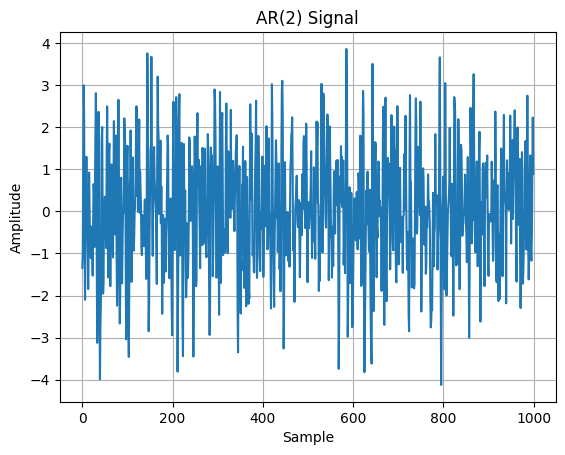

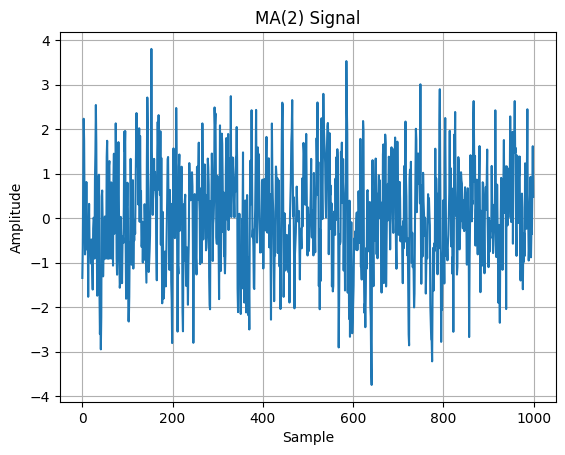

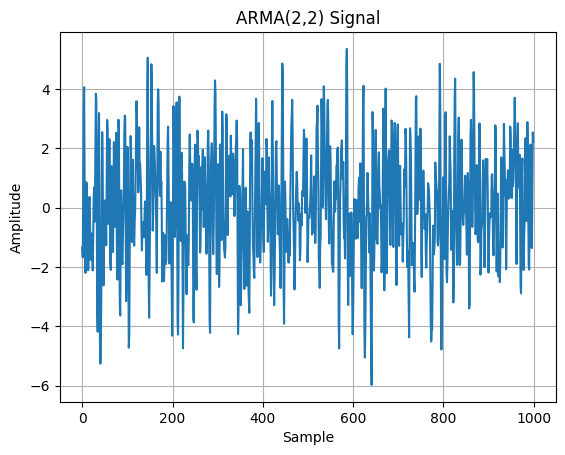

Estimated AR Coefficients: [-0.78890946  0.52851113]
Estimated Noise Variance: 0.9932907850285341


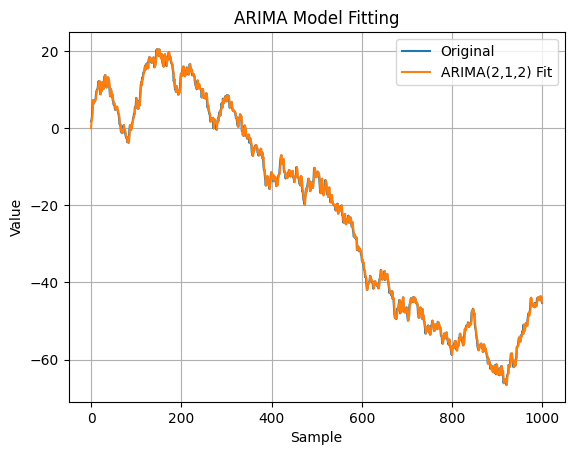

In [1]:
#1. Simulating an AR(2) Process

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

N = 1000
w = np.random.normal(0, 1, N)
a = [1, -0.75, 0.5]  # AR coefficients
ar_signal = lfilter([1], a, w)

plt.plot(ar_signal)
plt.title("AR(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

#2. Simulating an MA(2) Process

b = [1.0, 0.5, 0.25]  # MA coefficients
ma_signal = lfilter(b, [1], w)

plt.plot(ma_signal)
plt.title("MA(2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

#3. Simulating an ARMA(2,2) Process

a = [1, -0.75, 0.5]
b = [1.0, 0.5, 0.25]
arma_signal = lfilter(b, a, w)

plt.plot(arma_signal)
plt.title("ARMA(2,2) Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


#4. Estimating AR Model Parameters (Yule-Walker)

from statsmodels.regression.linear_model import yule_walker

rho, sigma = yule_walker(ar_signal, order=2)
print("Estimated AR Coefficients:", -rho)
print("Estimated Noise Variance:", sigma)


#5. ARIMA Modeling


import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate non-stationary signal: a trend + noise
N = 1000
np.random.seed(0)
trend = np.cumsum(np.random.normal(0, 1, N))

# Fit ARIMA(p=2, d=1, q=2)
model = ARIMA(trend, order=(2, 1, 2))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.predict(start=0, end=N-1)

plt.plot(trend, label="Original")
plt.plot(forecast, label="ARIMA(2,1,2) Fit")
plt.legend()
plt.title("ARIMA Model Fitting")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()



## Comparison Example: ARMA vs ARIMA

To demonstrate the difference between ARMA and ARIMA modeling approaches, consider a signal with a clear trend component. An ARMA model assumes stationarity and may not perform well without preprocessing (e.g., detrending), while an ARIMA model can inherently handle such trends through differencing.


C:\Users\xdkub\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\xdkub\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


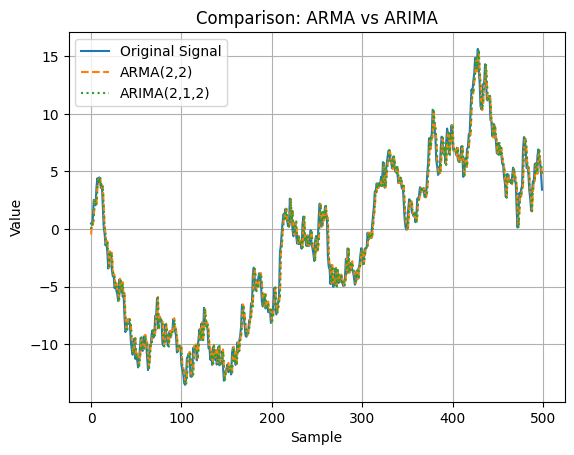

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

# Create a non-stationary signal with a linear trend
N = 500
np.random.seed(42)
trend = np.cumsum(np.random.normal(0, 1, N))

# Fit ARMA(2,2) model to non-stationary signal
arma_model = ARIMA(trend, order=(2, 0, 2))
arma_result = arma_model.fit()
arma_pred = arma_result.predict(start=0, end=N-1)

# Fit ARIMA(2,1,2) model
arima_model = ARIMA(trend, order=(2, 1, 2))
arima_result = arima_model.fit()
arima_pred = arima_result.predict(start=0, end=N-1)

# Plotting
plt.plot(trend, label="Original Signal")
plt.plot(arma_pred, label="ARMA(2,2)", linestyle='--')
plt.plot(arima_pred, label="ARIMA(2,1,2)", linestyle=':')
plt.title("Comparison: ARMA vs ARIMA")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


This example illustrates that ARIMA models better capture trends by incorporating differencing, while ARMA models may yield biased or poor fits unless the signal is preprocessed to be stationary.


AR(1): AIC = 2844.8559505696867 Residual Variance = 1.0009794159806822
AR(2): AIC = 2846.838218784966 Residual Variance = 1.000961672793916
MA(1): AIC = 2844.850756503343 Residual Variance = 1.0009742196572582


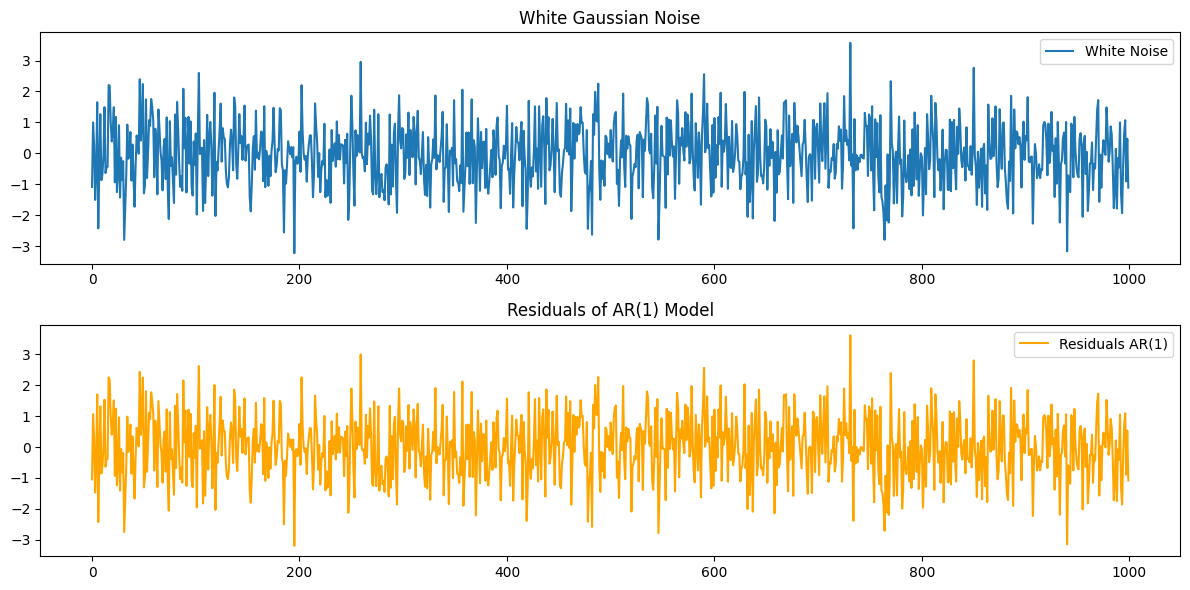

In [3]:
# New cell: Fit AR and MA models on white Gaussian noise and compare AIC and residual variance
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate white Gaussian noise
np.random.seed(123)
N = 1000
noise = np.random.normal(0, 1, N)

# Fit AR(1) model (order = (1,0,0))
model_ar1 = ARIMA(noise, order=(1, 0, 0))
result_ar1 = model_ar1.fit()
aic_ar1 = result_ar1.aic
resid_var_ar1 = np.var(result_ar1.resid)

# Fit AR(2) model (order = (2,0,0))
model_ar2 = ARIMA(noise, order=(2, 0, 0))
result_ar2 = model_ar2.fit()
aic_ar2 = result_ar2.aic
resid_var_ar2 = np.var(result_ar2.resid)

# Fit MA(1) model (order = (0,0,1))
model_ma1 = ARIMA(noise, order=(0, 0, 1))
result_ma1 = model_ma1.fit()
aic_ma1 = result_ma1.aic
resid_var_ma1 = np.var(result_ma1.resid)

# Compare AIC and Residual Variance
print("AR(1): AIC =", aic_ar1, "Residual Variance =", resid_var_ar1)
print("AR(2): AIC =", aic_ar2, "Residual Variance =", resid_var_ar2)
print("MA(1): AIC =", aic_ma1, "Residual Variance =", resid_var_ma1)

# Plot the original noise signal and AR(1) residuals as an example
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(noise, label="White Noise")
plt.title("White Gaussian Noise")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(result_ar1.resid, label="Residuals AR(1)", color='orange')
plt.title("Residuals of AR(1) Model")
plt.legend()

plt.tight_layout()
plt.show()